In [17]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 22.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Total Heartbeats Detected: 61


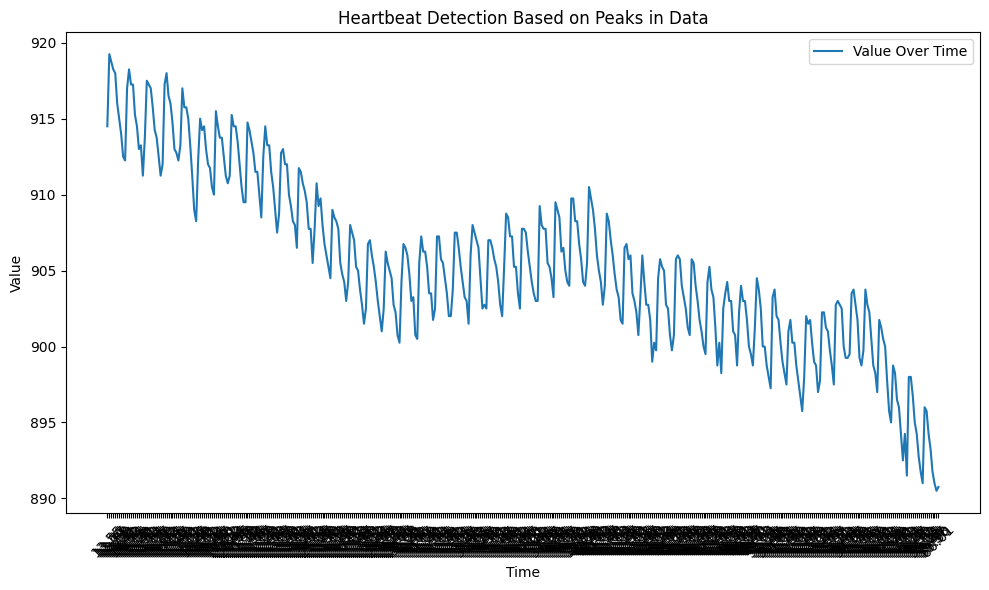

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the dataset
data = pd.read_csv('microbit.csv', header=None)
data.columns = ['Time', 'Unused', 'Value']

# Ensure 'Value' is numeric, converting any non-numeric values to NaN
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data = data.dropna(subset=['Value'])

# Filter out rows where 'Value' is less than 890
data = data[data['Value'] >= 890]

# Find peaks, which we define as heartbeats
peaks, _ = find_peaks(data['Value'])

# Count the number of peaks (heartbeats)
heartbeat_count = len(peaks)
print(f"Total Heartbeats Detected: {heartbeat_count}")

# Plot the data with detected peaks
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Value'], label='Value Over Time')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Heartbeat Detection Based on Peaks in Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()